# Kernelized Support Vector Machines

Follow _Introduction to Machine Learning_ [Chapter 2](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb)
- 2.3.7 Kernelized Support Vector Machines

Kernel (non-linear) Support vector machines for classification and regression



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import mglearn

## Linear SVM with non-linear features
### Linear SVM

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Add a quadratic feature

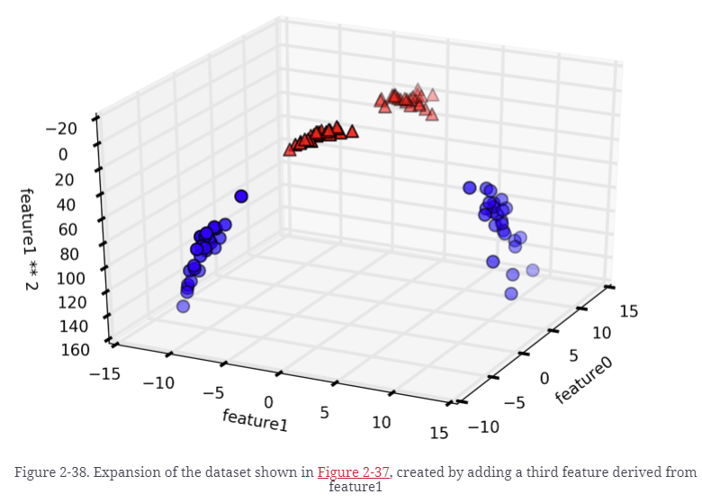

### Now it is linearly separable 

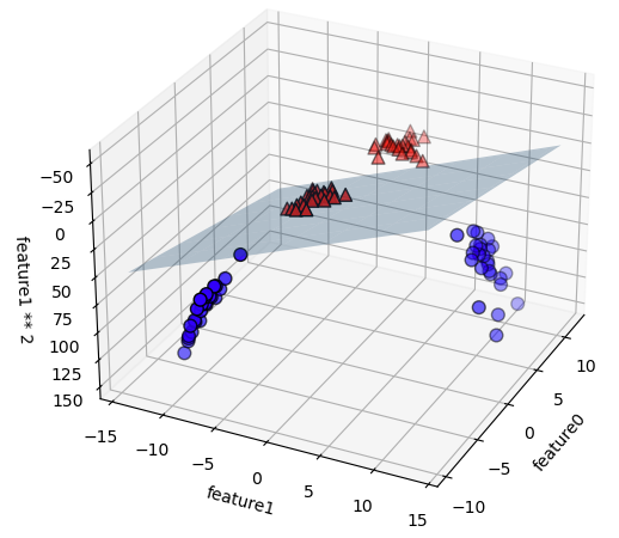

### Decision boundary as a function of original features is now non-linear

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Using a Kernel rather than transforming features

> The lesson here is that adding nonlinear features to the representation of our data can make linear models much more powerful. However, often we don’t know which features to add, and adding many features (like all possible interactions in a 100-dimensional feature space) might make computation very expensive. Luckily, there is a clever mathematical trick that allows us to learn a classifier in a higher-dimensional space without actually computing the new, possibly very large representation. This is known as the kernel trick, and it works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.

>There are two ways to map your data into a higher-dimensional space that are commonly used with support vector machines: the polynomial kernel, which computes all possible polynomials up to a certain degree of the original features (like feature1 ** 2 * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to an infinite-dimensional feature space. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees.

Popular kernels are:
1. Polynomial up to degree n
2. Radial basis function

We can get close to the above results with a polynomial kernel of degree 2 and using the original features.

## Tuning an RBF SVM

`C` regularization coefficient, higher means less regularization.

`gamma` inverse of RBF width:
>Intuitively, the gamma parameter determines how far the influence of a single training example reaches, with low values meaning corresponding to a far reach, and high values to a limited reach. In other words, the wider the radius of the Gaussian kernel, the further the influence of each training example.

From sklearn documentation [SVM kernel-functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions):
>Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use sklearn.model_selection.GridSearchCV with C and gamma spaced exponentially far apart to choose good values. We will discuss the GridSearchCV function more in the hyperparameter tuning section of the course.

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

### How does the RBF kernel look like?

The kernel is $\operatorname{exp}(\gamma \lVert x - x' \rVert^2)$
where $x - x'$ is the difference between two samples.

Smaller gammas results in influence extending further:

In [ ]:
d = np.linspace(-5, 5, 500)
for gamma in [0.1, 1, 10]:
    plt.plot(d, np.exp(-gamma*d**2), label=f'gamma={gamma}')
    
plt.legend();

### More on support vectors

According to [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/) by Christopher Bishop, 2006 Section 7.1:

For hard margin SVMs, i.e. no points are allowed within the margin, the support vectors are on the margin.

For soft margin SVMs, i.e. `SVC` as used here where points can be within the margin and even on the wrong side of the decision function, support vectors are the points with non-zero dual coefficients defining the boundary.

We should be able to remove or move slightly non-support vector points without changing the decision boundary (much).

In [ ]:
# Reference:
# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, -0.5, 0, 0.5, 1], alpha=0.5,
               linestyles=['--','-.', '-', '-.', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=10, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma=1).fit(X, y)

ax = plt.gca()
mglearn.tools.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

plot_svc_decision_function(svm, ax=ax, plot_support=False);

# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.tools.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax);


In the above plot:
- Solid line is the decision boundary at $f(x) = 0$
- Dash-dotted line is the half-way margin, decision boundary $f(x) = +0.5$ and $f(x) = -0.5$
- Dashed line is the margin, decision boundary at $f(x) = +1$ and $f(x) = -1$
- Larger circles and triangles are support vectors

In [ ]:
# Index of all the support vectors
sorted(svm.support_)

In [ ]:
# idx=5 is the triangle in the upper left corner that looks like it is on the boundary
X[5,:]

In [ ]:
# let's remove it
X_prime = np.delete(X, (5), axis=0)
y_prime = np.delete(y, (5), axis=0)

In [ ]:
svm_prime = SVC(kernel='rbf', C=1, gamma=1).fit(X_prime, y_prime)

ax = plt.gca()

mglearn.tools.discrete_scatter(X_prime[:, 0], X_prime[:, 1], y_prime, ax=ax)

plot_svc_decision_function(svm_prime, ax=ax, plot_support=False);

# plot support vectors
sv = svm_prime.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm_prime.dual_coef_.ravel() > 0
mglearn.tools.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax);

plt.plot(X[5, 0], X[5, 1], 'k*', markersize=20, markeredgewidth=1, markerfacecolor='y');


Removing the non-support vector point (yellow star) produces the same decision boundary are previously.

## RBF SVM classifier for breast cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()


X_train, X_val, y_train, y_val = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Unscaled features")
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on validation set: {:.2f}".format(svc.score(X_val, y_val)))

## Preprocessing is important

SVMs are very sensitive to feature ranges. Scaling with StandardScaler or MinMaxScaler is important.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Using MinMaxScaler")
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on validation set: {:.2f}".format(svc.score(X_val_scaled, y_val)))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Using StandardScaler")
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on validation set: {:.2f}".format(svc.score(X_val_scaled, y_val)))